In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Sales_February_2019.csv').drop_duplicates().dropna(how='all')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11969 entries, 0 to 12035
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          11969 non-null  object
 1   Product           11969 non-null  object
 2   Quantity Ordered  11969 non-null  object
 3   Price Each        11969 non-null  object
 4   Order Date        11969 non-null  object
 5   Purchase Address  11969 non-null  object
dtypes: object(6)
memory usage: 654.6+ KB


In [4]:
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
12031,162004,Apple Airpods Headphones,1,150,02/12/19 22:02,"227 Church St, San Francisco, CA 94016"
12032,162005,AAA Batteries (4-pack),2,2.99,02/04/19 20:44,"417 Jefferson St, Los Angeles, CA 90001"
12033,162006,USB-C Charging Cable,1,11.95,02/24/19 06:31,"498 8th St, Atlanta, GA 30301"
12034,162007,USB-C Charging Cable,1,11.95,02/24/19 19:09,"715 7th St, Dallas, TX 75001"
12035,162008,27in FHD Monitor,1,149.99,02/26/19 17:15,"677 West St, Los Angeles, CA 90001"


In [5]:
condition = df['Quantity Ordered'] == 'Quantity Ordered'
df = df[~condition]

In [6]:
df['Order ID']=df['Order ID'].astype('category')
df['Quantity Ordered']=df['Quantity Ordered'].astype('float')
df['Price Each']=df['Price Each'].astype('float')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11968 entries, 0 to 12035
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Order ID          11968 non-null  category
 1   Product           11968 non-null  object  
 2   Quantity Ordered  11968 non-null  float64 
 3   Price Each        11968 non-null  float64 
 4   Order Date        11968 non-null  object  
 5   Purchase Address  11968 non-null  object  
dtypes: category(1), float64(2), object(3)
memory usage: 932.3+ KB


In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11968 entries, 0 to 12035
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          11968 non-null  category      
 1   Product           11968 non-null  object        
 2   Quantity Ordered  11968 non-null  float64       
 3   Price Each        11968 non-null  float64       
 4   Order Date        11968 non-null  datetime64[ns]
 5   Purchase Address  11968 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(2), object(2)
memory usage: 932.3+ KB


In [10]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1.0,700.00,2019-02-18 01:35:00,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1.0,3.84,2019-02-13 07:24:00,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1.0,389.99,2019-02-18 09:46:00,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1.0,14.95,2019-02-02 16:47:00,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2.0,3.84,2019-02-28 20:32:00,"548 Lincoln St, Seattle, WA 98101"


In [11]:
df['City']= df['Purchase Address'].str.split(',').str.get(1).str.strip()

In [12]:
df['State']= df['Purchase Address'].str.split(',').str.get(2).str.strip().str.split(' ').str.get((0)).str.strip()

In [13]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,State
0,150502,iPhone,1.0,700.00,2019-02-18 01:35:00,"866 Spruce St, Portland, ME 04101",Portland,ME
1,150503,AA Batteries (4-pack),1.0,3.84,2019-02-13 07:24:00,"18 13th St, San Francisco, CA 94016",San Francisco,CA
2,150504,27in 4K Gaming Monitor,1.0,389.99,2019-02-18 09:46:00,"52 6th St, New York City, NY 10001",New York City,NY
3,150505,Lightning Charging Cable,1.0,14.95,2019-02-02 16:47:00,"129 Cherry St, Atlanta, GA 30301",Atlanta,GA
4,150506,AA Batteries (4-pack),2.0,3.84,2019-02-28 20:32:00,"548 Lincoln St, Seattle, WA 98101",Seattle,WA


In [75]:
#for analysis
#groupby
#agg
c2 = df.groupby('Product').agg({'Order ID':'count'})

In [15]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'City', 'State'],
      dtype='object')

In [16]:
del df['Purchase Address']

In [17]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,City,State
0,150502,iPhone,1.0,700.00,2019-02-18 01:35:00,Portland,ME
1,150503,AA Batteries (4-pack),1.0,3.84,2019-02-13 07:24:00,San Francisco,CA
2,150504,27in 4K Gaming Monitor,1.0,389.99,2019-02-18 09:46:00,New York City,NY
3,150505,Lightning Charging Cable,1.0,14.95,2019-02-02 16:47:00,Atlanta,GA
4,150506,AA Batteries (4-pack),2.0,3.84,2019-02-28 20:32:00,Seattle,WA


In [18]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'City', 'State'],
      dtype='object')

In [19]:
# Check for missing values
print(df.isnull().sum())


Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
City                0
State               0
dtype: int64


In [20]:
# Perform basic summary statistics
print(df.describe())

       Quantity Ordered    Price Each
count      11968.000000  11968.000000
mean           1.123245    182.853890
std            0.431408    325.695542
min            1.000000      2.990000
25%            1.000000     11.950000
50%            1.000000     14.950000
75%            1.000000    150.000000
max            7.000000   1700.000000


In [21]:
# Analyze sales trends over time
df['Day'] = df['Order Date'].dt.day_name()
daily_sales = df.groupby('Day')['Quantity Ordered'].sum()

In [70]:
# Visualize sales trends
import matplotlib.pyplot as plt


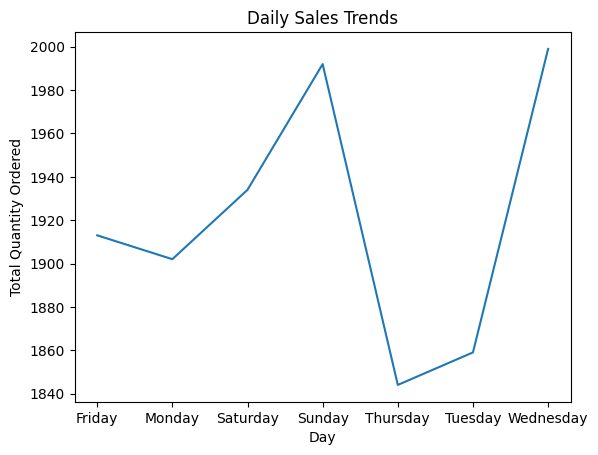

In [60]:
plt.plot(daily_sales.index, daily_sales.values)
plt.xlabel('Day')
plt.ylabel('Total Quantity Ordered')
plt.title('Daily Sales Trends')
plt.show()

From the plot, we observe that the highest sales occur on Sunday (1992 units), followed closely by Wednesday (1999 units), while the lowest sales are on Thursday (1844 units). This information suggests a possible correlation between certain days of the week and sales volume, which could be further explored for targeted marketing or operational strategies.

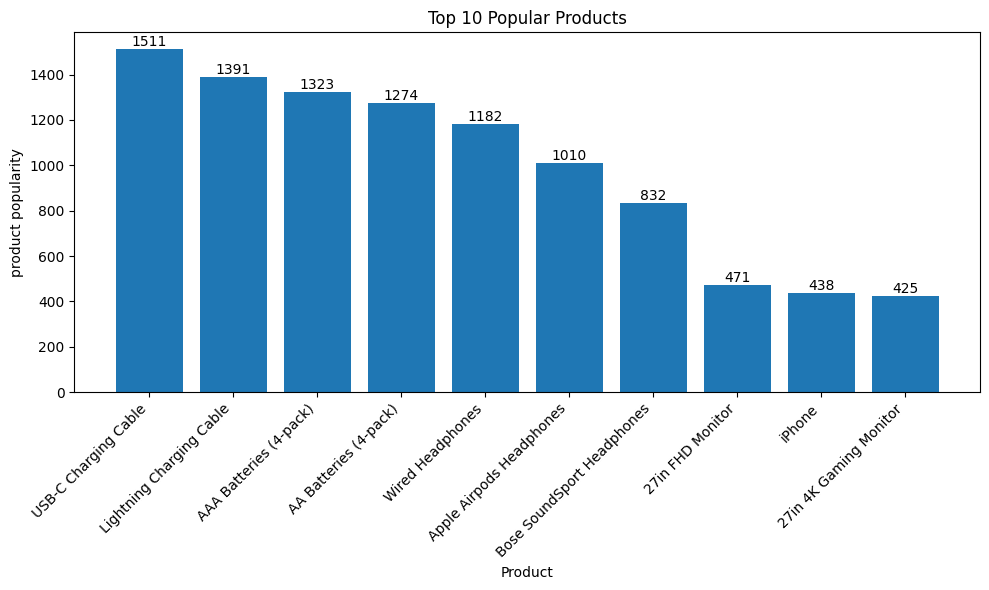

In [66]:
# Analyze product popularity
popular_products = df['Product'].value_counts().head(10)
plt.figure(figsize=(10,6))
bars=plt.bar(popular_products.index,popular_products.values)
plt.title('Top 10 Popular Products')
plt.xlabel('Product')
plt.ylabel('product popularity')
plt.xticks(rotation=45,ha='right')
# Adding text labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')
    
plt.tight_layout()
plt.show()

The data presents the top 10 products sold, along with their respective sales quantities. It appears that the most popular product is the 'USB-C Charging Cable' with 1511 units sold, followed by the 'Lightning Charging Cable' with 1391 units sold. Additionally, we observe that electronic accessories such as cables and batteries dominate the list, suggesting a high demand for these items among consumers.

lowest Popular Products:
 Macbook Pro Laptop    275
20in Monitor          245
Vareebadd Phone       129
LG Washing Machine     40
LG Dryer               38
Name: Product, dtype: int64


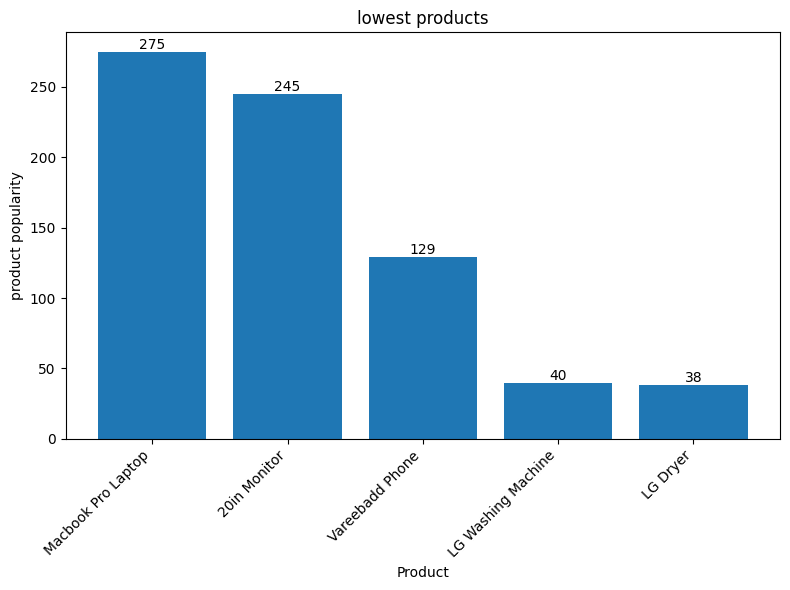

In [69]:
lower_products = df['Product'].value_counts().tail(5)
print("lowest Popular Products:\n", lower_products)
plt.figure(figsize=(8,6))
bars=plt.bar(lower_products.index,lower_products.values)
plt.title('lowest products')
plt.xlabel('Product')
plt.ylabel('product popularity')
plt.xticks(rotation=45,ha='right')
# Adding text labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')
plt.tight_layout()
plt.show()

The data highlights the lowest popular products, along with their respective sales quantities. Among these items, the 'Macbook Pro Laptop' has the highest sales quantity at 275 units, followed by the '20in Monitor' with 245 units. Notably, electronic devices like laptops and monitors are among the least popular products, indicating potentially lower demand or niche market segments for these items compared to other product categories.


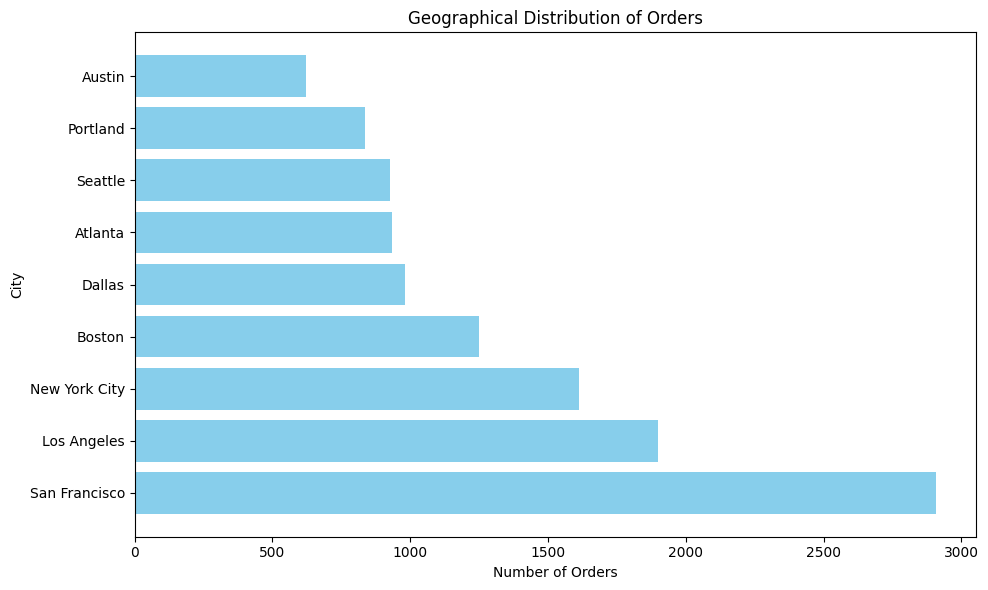

In [74]:
# Analyze geographical distribution
city_distribution = df['City'].value_counts()
plt.figure(figsize=(10,6))
plt.barh(city_distribution.index,city_distribution.values,color='skyblue')
plt.xlabel('Number of Orders')
plt.ylabel('City')
plt.title('Geographical Distribution of Orders')
plt.tight_layout()
plt.show()

The data showcases the geographical distribution of orders across different cities. San Francisco emerges as the city with the highest number of orders, totaling 2908, followed by Los Angeles with 1899 orders and New York City with 1611 orders. Conversely, Austin appears to have the lowest order count at 622, indicating potentially varying market demands across different regions. This geographical insight could inform targeted marketing strategies or distribution logistics to capitalize on high-demand areas while addressing potential growth opportunities in regions with lower order volumes.

In [44]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,City,State,Day
0,150502,iPhone,1.0,700.00,2019-02-18 01:35:00,Portland,ME,Monday
1,150503,AA Batteries (4-pack),1.0,3.84,2019-02-13 07:24:00,San Francisco,CA,Wednesday
2,150504,27in 4K Gaming Monitor,1.0,389.99,2019-02-18 09:46:00,New York City,NY,Monday
3,150505,Lightning Charging Cable,1.0,14.95,2019-02-02 16:47:00,Atlanta,GA,Saturday
4,150506,AA Batteries (4-pack),2.0,3.84,2019-02-28 20:32:00,Seattle,WA,Thursday


In [81]:
# Calculate total sales revenue
df['Total Revenue'] = df['Quantity Ordered'] * df['Price Each']
total_sales_revenue = df['Total Revenue'].sum()
print("Total Sales Revenue in February:", total_sales_revenue)


Total Sales Revenue in February: 2201536.8999999994


In [48]:
# Analyze price distribution
price_distribution = df['Price Each'].describe()
print("Price Analysis in February:\n", price_distribution)

Price Analysis in February:
 count    11968.000000
mean       182.853890
std        325.695542
min          2.990000
25%         11.950000
50%         14.950000
75%        150.000000
max       1700.000000
Name: Price Each, dtype: float64


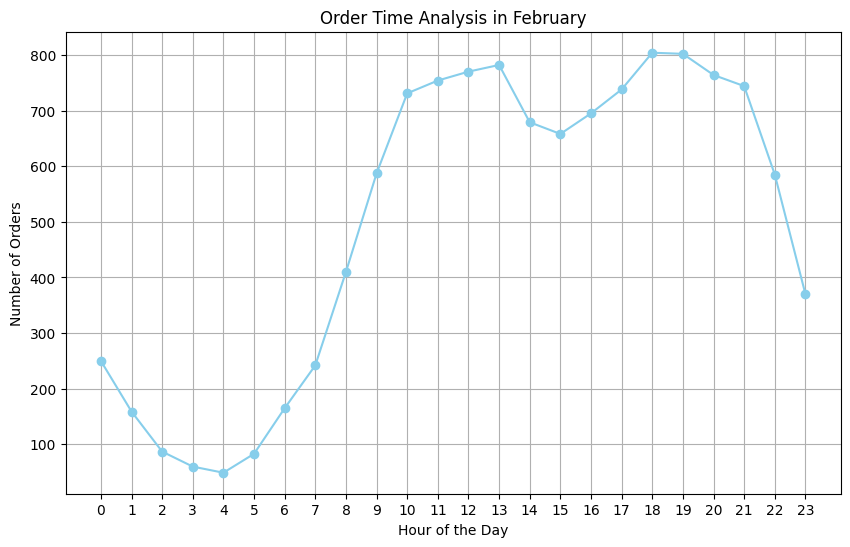

In [71]:
# Extract hour from order date
df['Order Hour'] = df['Order Date'].dt.hour
order_time_analysis = df.groupby('Order Hour')['Order ID'].count()
plt.figure(figsize=(10, 6))
plt.plot(order_time_analysis.index, order_time_analysis.values, marker='o', color='skyblue')
plt.title('Order Time Analysis in February')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.xticks(range(24))  # Set x-axis ticks to every hour
plt.grid(True)
plt.show()


We observe that the highest number of orders occurs during daytime hours, particularly from 10 AM to 1 PM and again from 6 PM to 8 PM, peaking at 8 PM with 804 orders. This pattern suggests that customers tend to make purchases during traditional business hours and in the early evening, possibly after returning from work. Conversely, the early morning hours see a decline in orders, with the lowest count at 3 AM, indicating minimal activity during late-night hours. Understanding these hourly order patterns can aid in scheduling promotions or adjusting staffing levels to accommodate peak demand periods.

In [52]:
# Analyze sales performance by state
state_sales_analysis = df.groupby('State')['Price Each'].sum().sort_values(ascending=False)
print("State-wise Sales Analysis in February:\n", state_sales_analysis)


State-wise Sales Analysis in February:
 State
CA    885240.77
NY    303070.09
TX    291608.05
MA    213421.50
GA    175935.97
WA    170166.84
OR    119251.47
ME     29700.67
Name: Price Each, dtype: float64


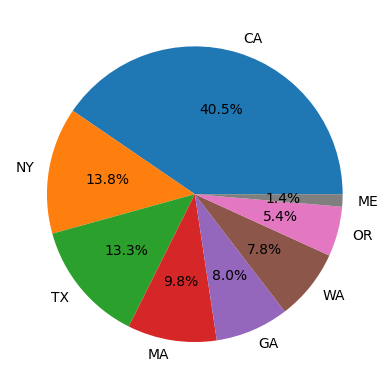

In [73]:
# Analyze sales performance by state
state_sales_analysis = df.groupby('State')['Price Each'].sum().sort_values(ascending=False)
plt.pie(state_sales_analysis.values,labels=state_sales_analysis.index,autopct='%0.1f%%')
plt.show()


The data reveals the percentage of total revenue contributed by each state in February. California (CA) emerges as the largest contributor, accounting for approximately 40.5% of the total revenue. New York (NY) follows closely, representing around 13.8% of the total revenue. Texas (TX) and Massachusetts (MA) also make significant contributions, comprising approximately 13.3% and 9.7% of the total revenue, respectively. Understanding the revenue distribution across states enables strategic decision-making to focus marketing efforts and resource allocation effectively.